In [2]:
#Importing all the neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [5]:
data1 = pd.read_csv('C:/Users/Varsha/PythonWorkspace/bank-additional-full.csv')
df =pd.read_csv('C:/Users/Varsha/PythonWorkspace/bank-additional-full.csv')

In [4]:
data1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#Plotting the graphs for categorical and continuous variables
data1.shape
data1.describe(include=["object"])
categorical_vars = data1.describe(include=["object"]).columns
continuous_vars = data1.describe().columns

categorical_vars
continuous_vars


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

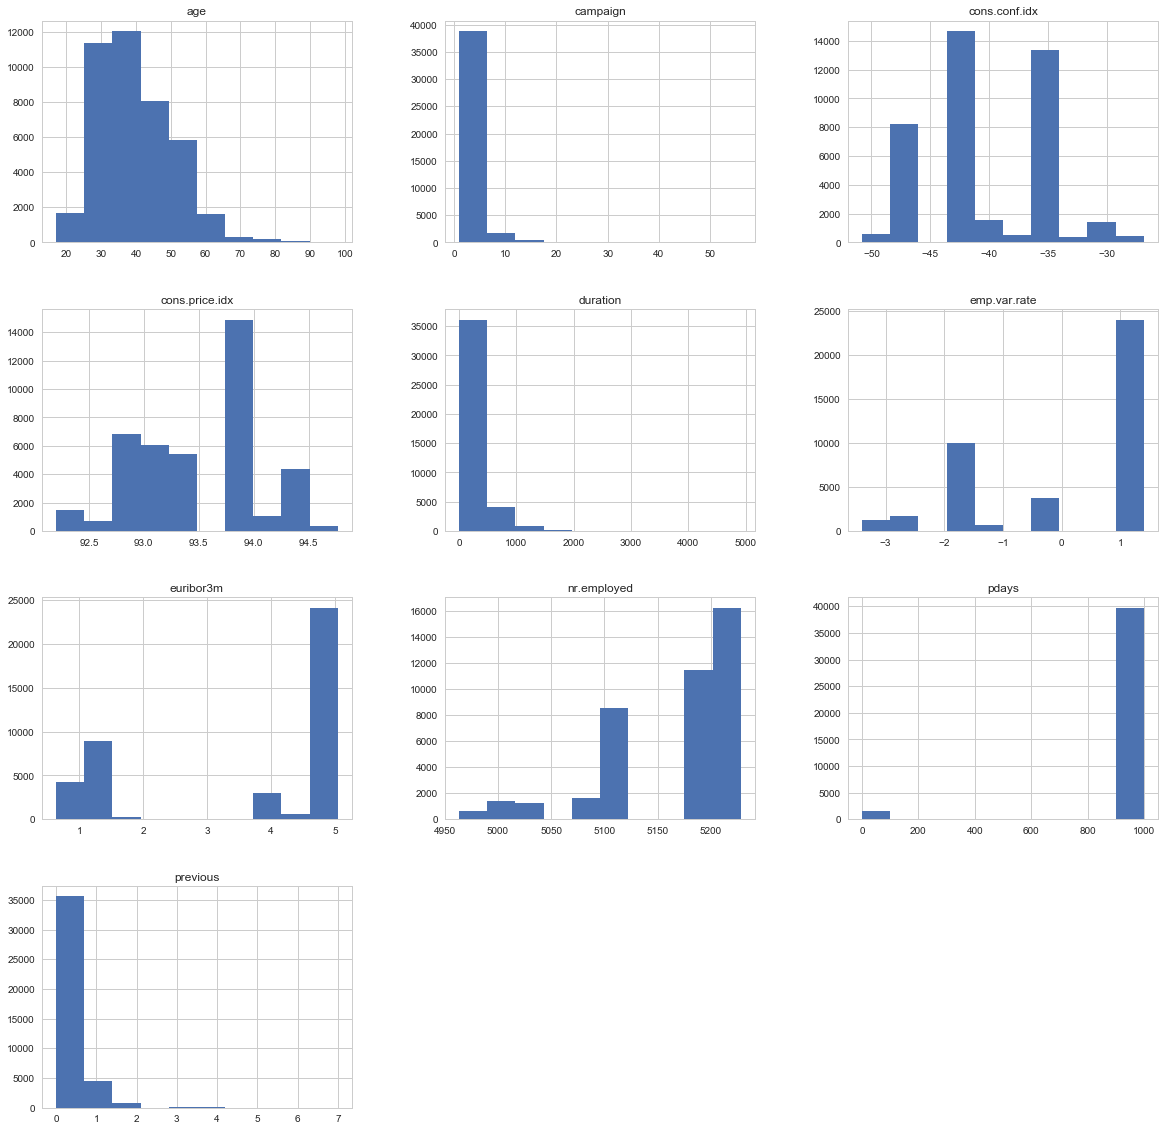

In [6]:
_ = data1.hist(column=continuous_vars, figsize = (20,20))
plt.show()



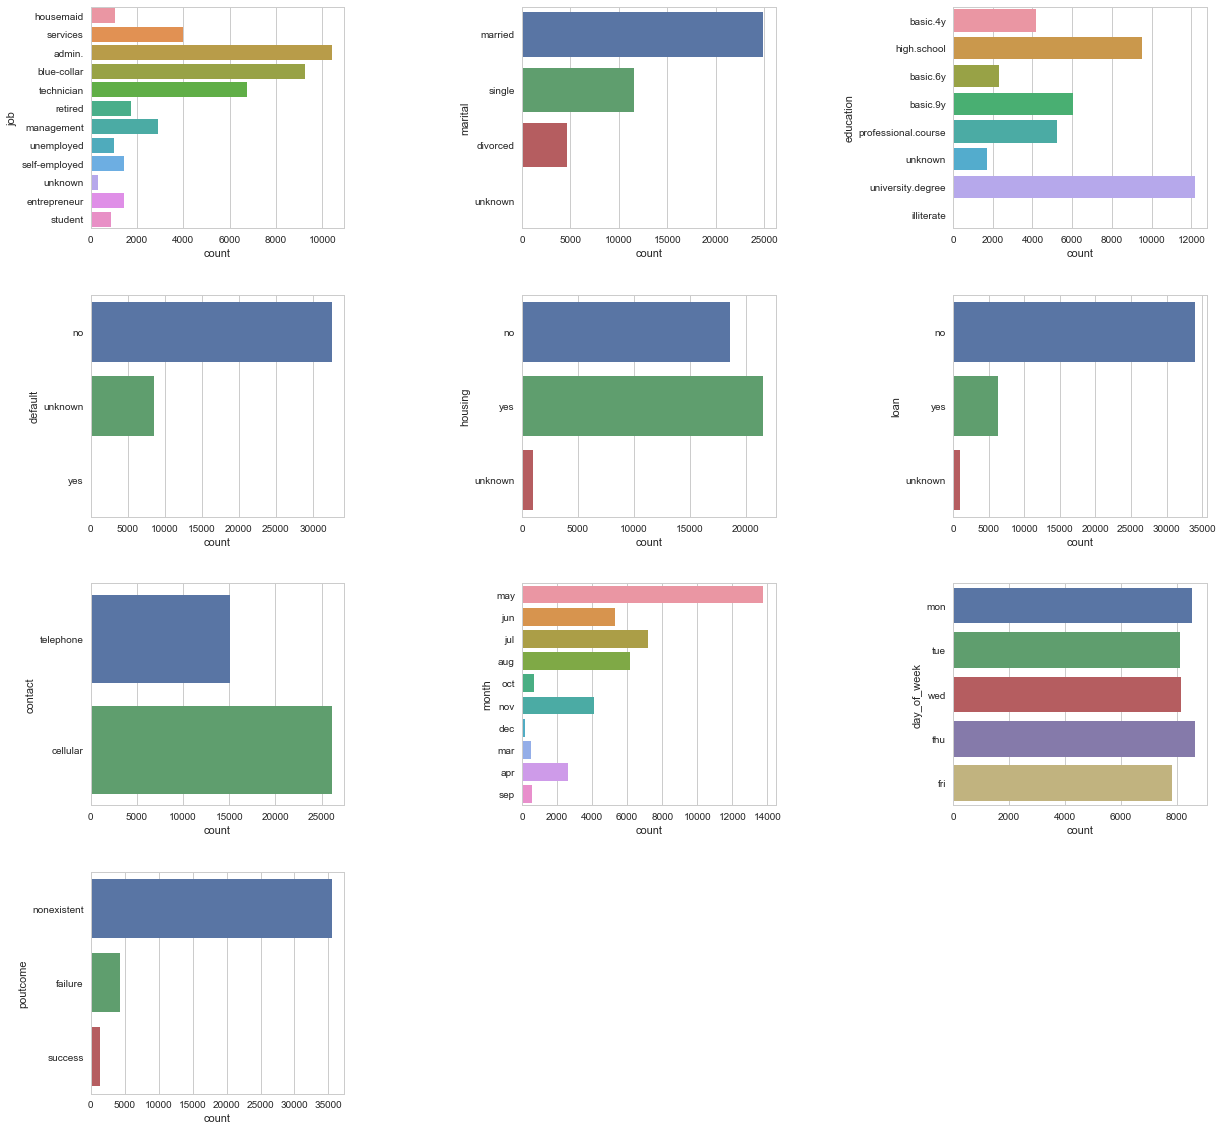

In [7]:
# Count plots of categorical variables

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=data1, ax=ax)
plt.show()

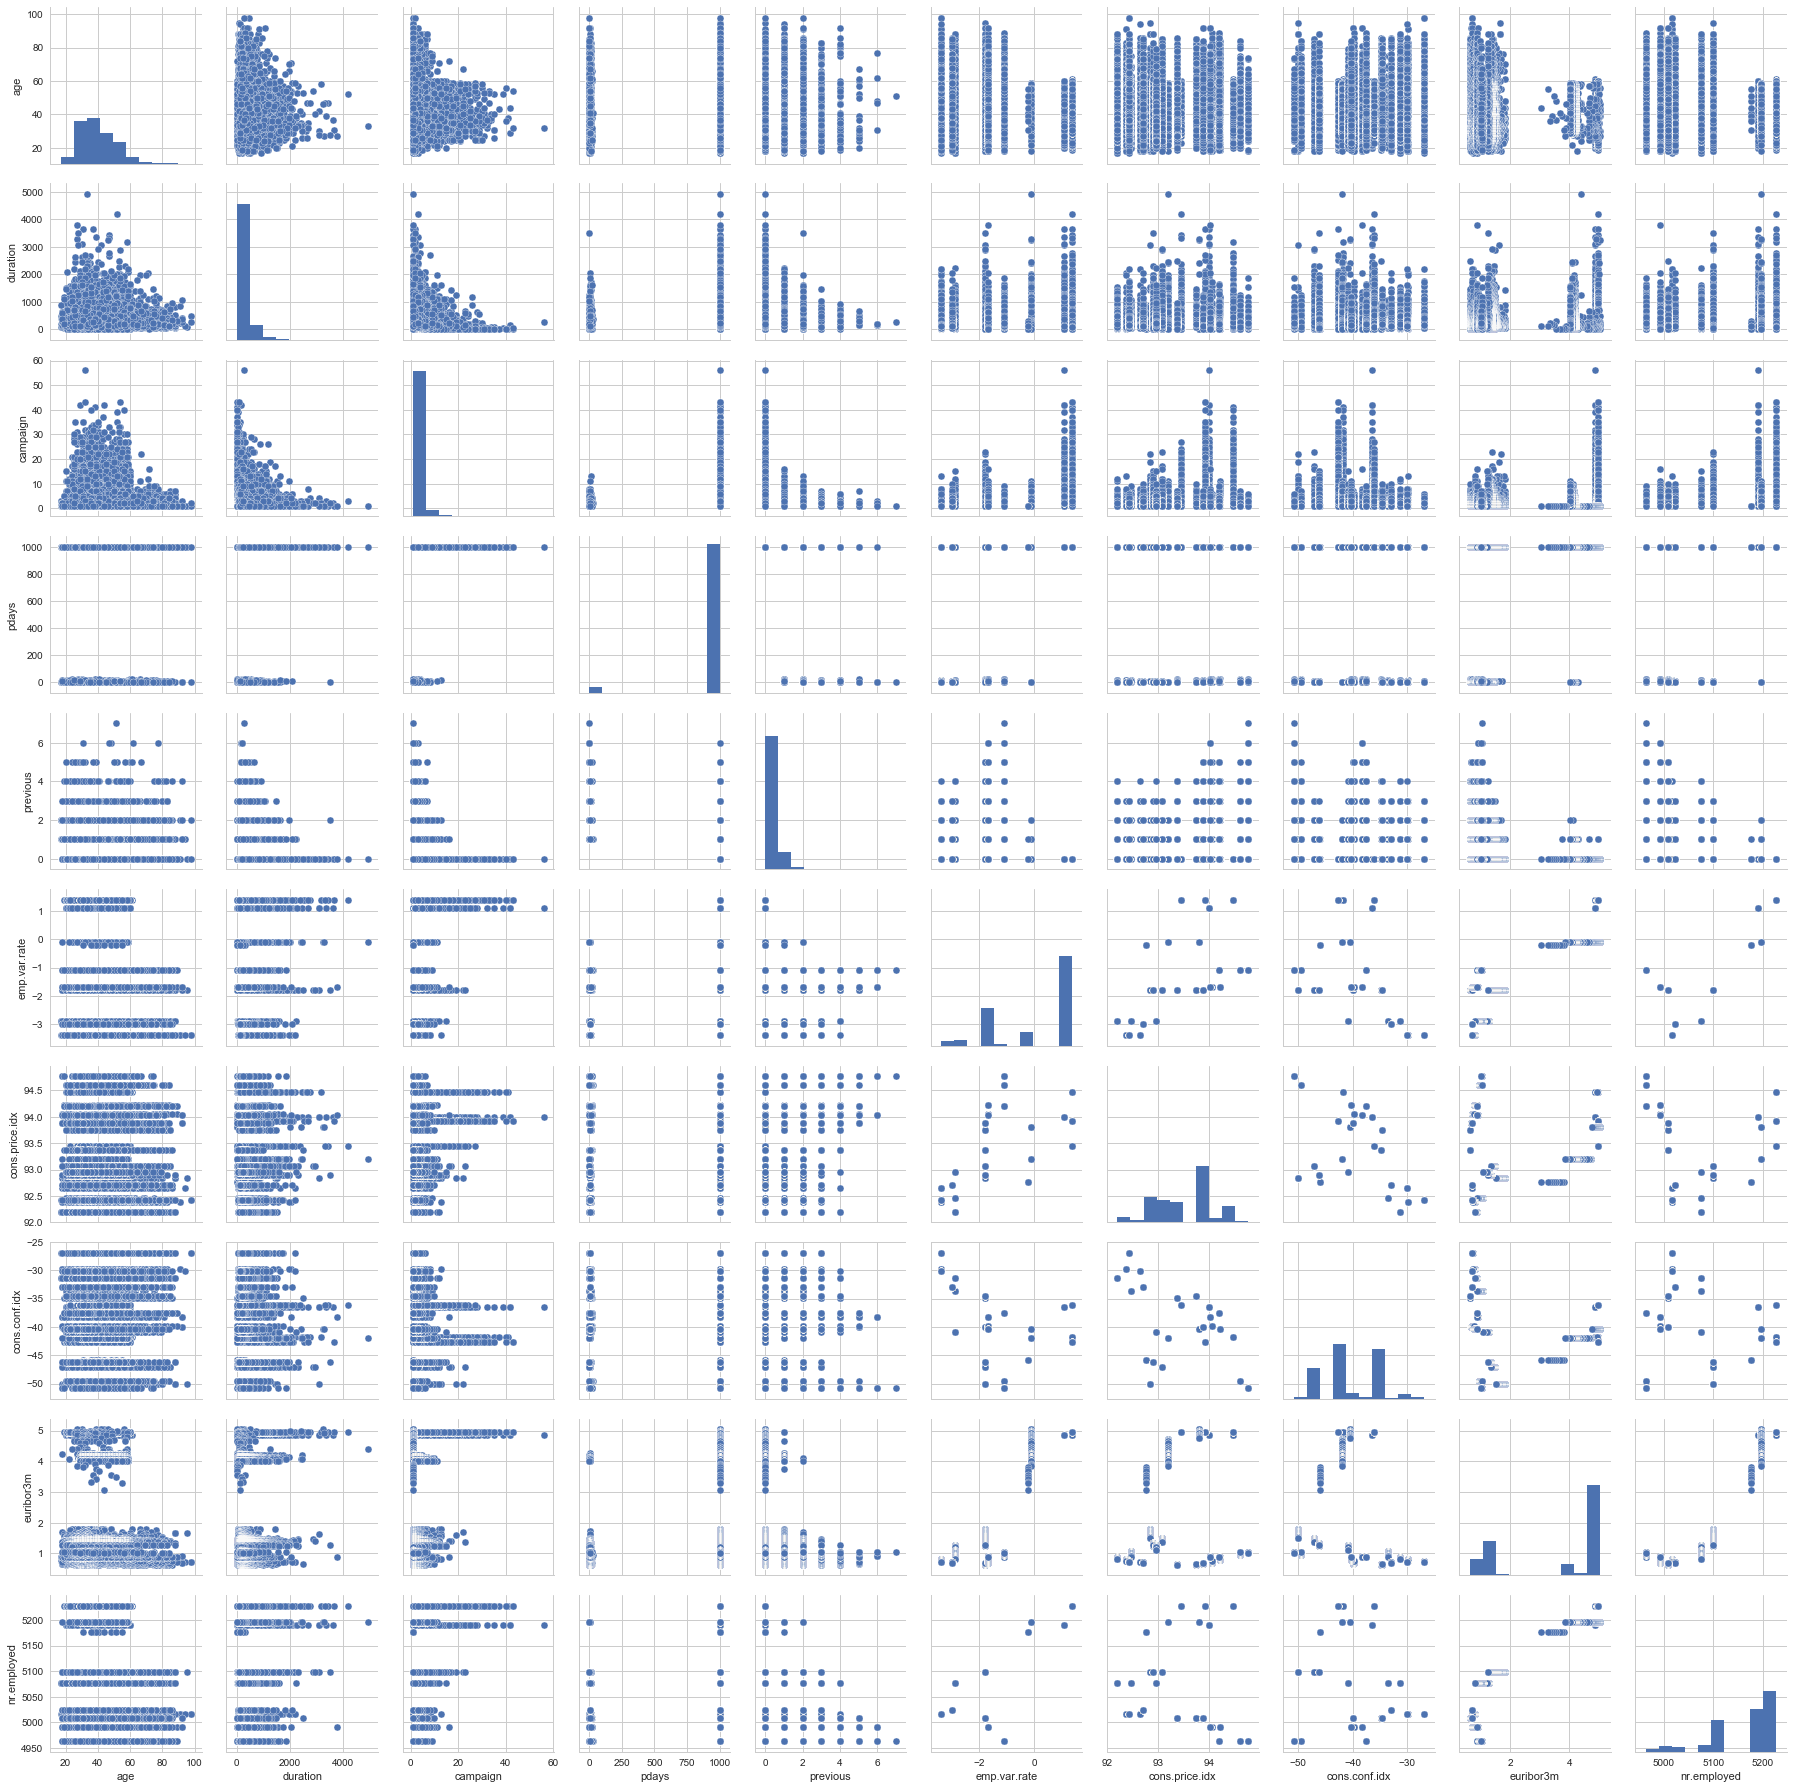

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [7]:
df.rename(columns={'y':'willRespond'},inplace=True)       
    
df.describe(include=["object"]).columns    


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'willRespond'],
      dtype='object')

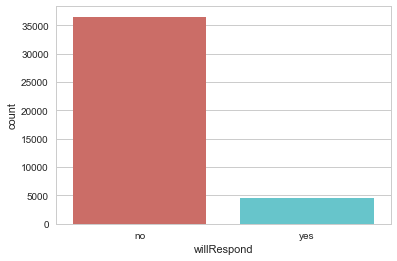

In [11]:
#PLOT
df['willRespond'].value_counts()
sns.countplot(x='willRespond',data=df,palette='hls')
plt.show()
 


In [12]:
#PLOT
df.groupby('willRespond').mean()
df.groupby('job').mean()
df.groupby('marital').mean()
df.groupby('education').mean()




,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


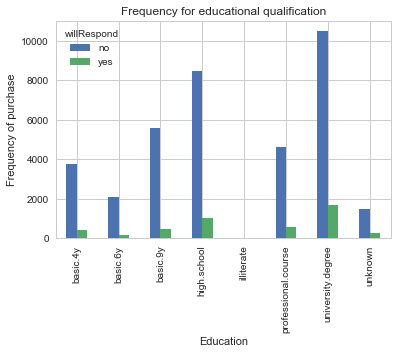

Good predictor of outcome variable


In [13]:
pd.crosstab(df.education,df.willRespond).plot(kind='bar')
plt.title('Frequency for educational qualification')
plt.xlabel('Education')
plt.ylabel('Frequency of purchase')
plt.show()
print("Good predictor of outcome variable")




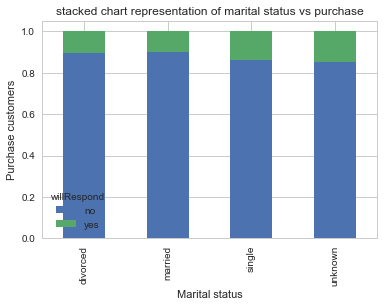

Not a great predictor of outcome variable


In [14]:
table = pd.crosstab(df.marital,df.willRespond)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('stacked chart representation of marital status vs purchase')
plt.xlabel('Marital status')
plt.ylabel('Purchase customers')
plt.show()
print("Not a great predictor of outcome variable")


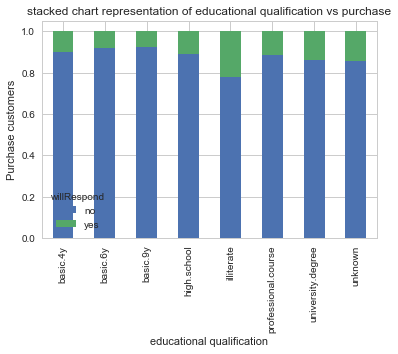

Good predictor of outcome variable


In [15]:
table = pd.crosstab(df.education,df.willRespond)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('stacked chart representation of educational qualification vs purchase')
plt.xlabel('educational qualification')
plt.ylabel('Purchase customers')
plt.show()
print("Good predictor of outcome variable")


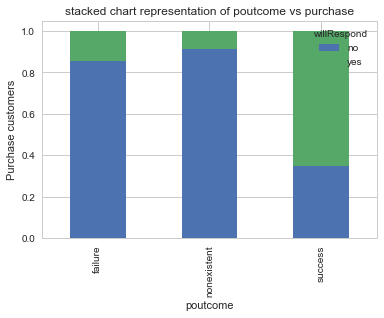

 Good predictor of outcome variable


In [16]:
table = pd.crosstab(df['poutcome'],df['willRespond'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('stacked chart representation of poutcome vs purchase')
plt.xlabel('poutcome')
plt.ylabel('Purchase customers')
plt.show()
print(" Good predictor of outcome variable")


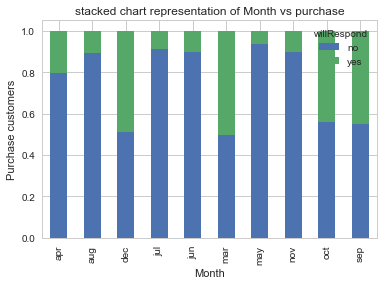

Good predictor of outcome variable


In [17]:
table = pd.crosstab(df.month,df.willRespond)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('stacked chart representation of Month vs purchase')
plt.xlabel('Month')
plt.ylabel('Purchase customers')
plt.show()
print("Good predictor of outcome variable")



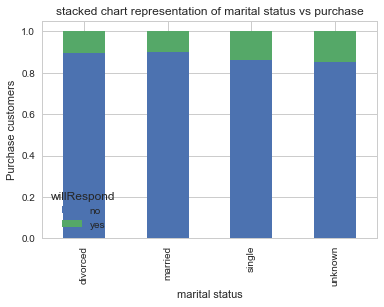

good predictor of outcome variable


In [9]:
table = pd.crosstab(df.marital,df.willRespond)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('stacked chart representation of marital status vs purchase')
plt.xlabel('marital status')
plt.ylabel('Purchase customers')
plt.show()
print("good predictor of outcome variable")




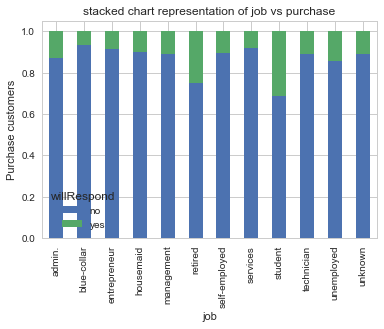

 good predictor of outcome variable


In [10]:
table = pd.crosstab(df.job,df.willRespond)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('stacked chart representation of job vs purchase')
plt.xlabel('job')
plt.ylabel('Purchase customers')
plt.show()
print(" good predictor of outcome variable")




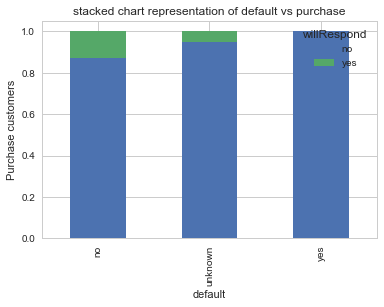

 good predictor of outcome variable


In [11]:
table = pd.crosstab(df.default,df.willRespond)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('stacked chart representation of default vs purchase')
plt.xlabel('default')
plt.ylabel('Purchase customers')
plt.show()
print(" good predictor of outcome variable")




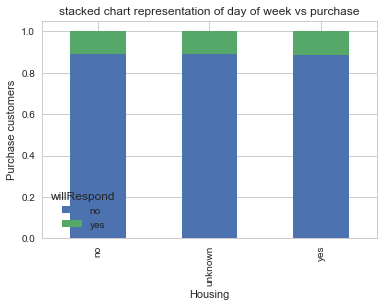

 good predictor of outcome variable


In [12]:
table = pd.crosstab(df.housing,df.willRespond)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('stacked chart representation of day of week vs purchase')
plt.xlabel('Housing')
plt.ylabel('Purchase customers')
plt.show()
print(" good predictor of outcome variable")




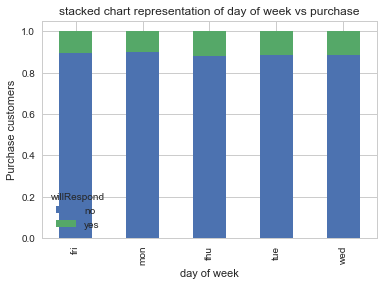

not good predictor of outcome variable


In [18]:
table = pd.crosstab(df.day_of_week,df.willRespond)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('stacked chart representation of day of week vs purchase')
plt.xlabel('day of week')
plt.ylabel('Purchase customers')
plt.show()
print("not good predictor of outcome variable")





In [19]:
#PREPROCESSING the various fields
le=preprocessing.LabelEncoder()
le.fit(df.poutcome)
list(le.classes_)
df.head(2)
df.poutcome=le.transform(df.poutcome)
df.housing=le.fit_transform(df.housing)
df.loan=le.fit_transform(df.loan)
df.job=le.fit_transform(df.job)
df.marital=le.fit_transform(df.marital)
df.education=le.fit_transform(df.education)
df.head()
    
list(le.classes_)

['basic.4y',
 'basic.6y',
 'basic.9y',
 'high.school',
 'illiterate',
 'professional.course',
 'university.degree',
 'unknown']

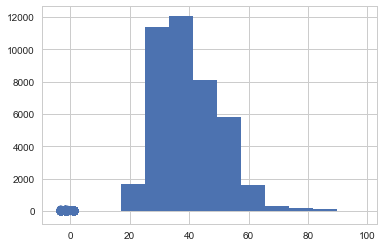

In [20]:
#  Plotting few histograms and scatter plots
plt.hist(df.age)
df['age'].describe()  
plt.scatter(df['emp.var.rate'],df['age'])
plt.show()


In [21]:
#Checking for total occurence of unique values   
df.apply(lambda x: len(x.unique()))
    

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
willRespond          2
dtype: int64

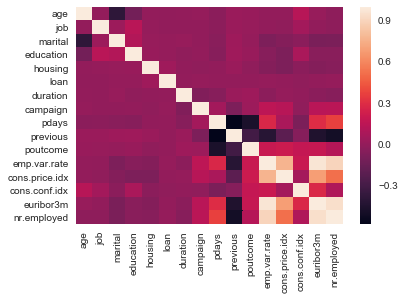

In [22]:
#Putting the correlation map to check the relationship between fields
sns.heatmap(df.corr())
plt.show()

In [23]:
#Converting into object to apply thge scaler
le=LabelEncoder()

for col in df.columns.values:
       if df[col].dtypes=='object':
        data=df[col].append(df[col])
        le.fit(data.values)
        df[col]=le.transform(df[col])
        

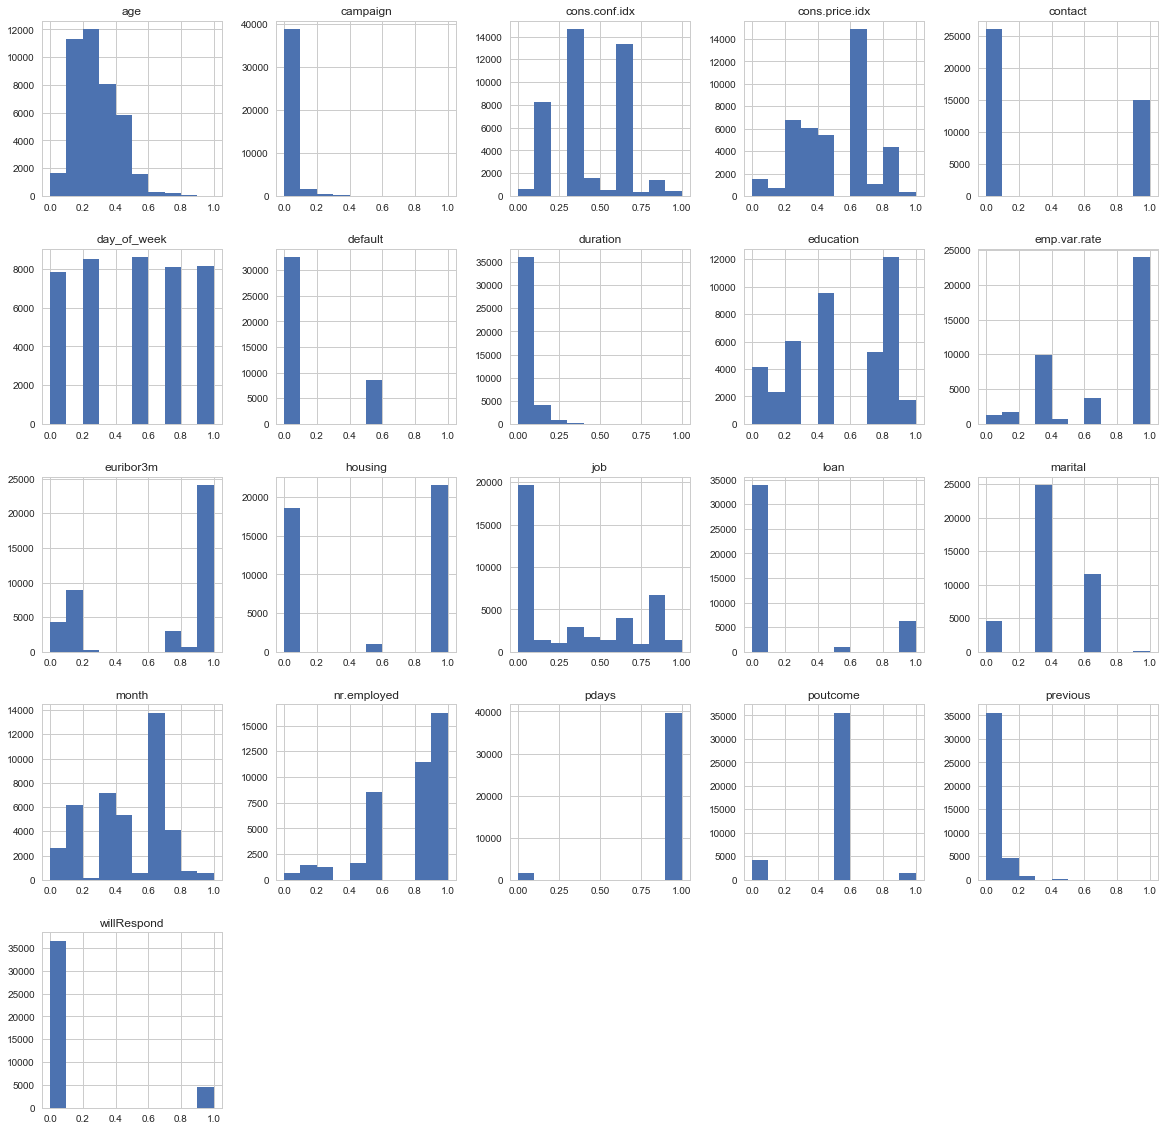

In [24]:
#Applying scaling transformation        
minmax_scale =preprocessing.MinMaxScaler().fit(df)
df_minmax =minmax_scale.transform(df)
df_minmax = pd.DataFrame(df_minmax, columns=list(df))
df_minmax.hist(figsize=(20,20))
plt.show()


In [25]:
df = df.dropna()
print(df.shape)
print(list(df.columns))


(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'willRespond']


In [26]:
df.drop(df.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)


In [27]:
df2 = pd.get_dummies(df, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
df2.drop(df2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
df2.columns

Index(['willRespond', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5',
       'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'marital_0', 'marital_1',
       'marital_2', 'default_0', 'default_2', 'housing_0', 'housing_2',
       'loan_0', 'loan_2', 'poutcome_0', 'poutcome_1', 'poutcome_2'],
      dtype='object')

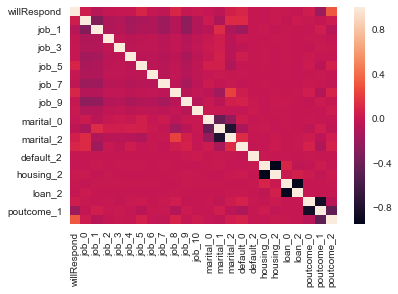

In [28]:
sns.heatmap(df2.corr())
plt.show()

In [29]:
#LOGISTIC REGRESSION
X = df2.iloc[:,1:]
y = df2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [30]:
X_train.shape

(30891, 23)

In [31]:
X_test.shape

(10297, 23)

In [32]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[9016  123]
 [ 946  212]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.94      9139
          1       0.63      0.18      0.28      1158

avg / total       0.87      0.90      0.87     10297



[[9016  123]
 [ 946  212]]
Accuracy of logistic regression classifier on test set: 0.90


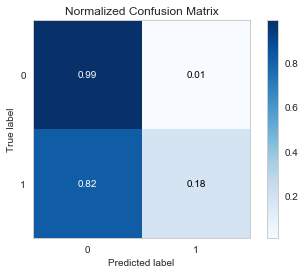

In [35]:
#Printing the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)  
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()



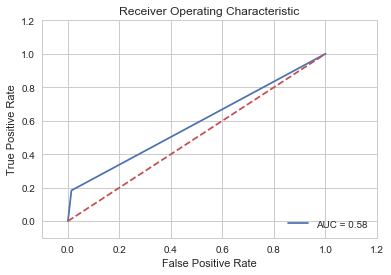

In [36]:
from sklearn.metrics import roc_curve, auc
actual = y_test
predictions = y_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(df2, test_size = 0.3, random_state = 42)


In [38]:

from sklearn.neighbors import KNeighborsClassifier
#x_train = train[list(num_cols)].values
x_train = train.values
x_test= test.values
y_train = train['willRespond'].values
y_test = test['willRespond'].values

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn.fit(x_test, y_test)

x_test =  test.values
predictions = knn.predict(x_test)

accuracy_train = accuracy_score(y_train, knn.predict(x_train))
accuracy_test = accuracy_score(y_test,knn.predict(x_test))
acc=accuracy_score(y_test,predictions)
print("Accuracy is ",acc)

print("train score",accuracy_train)
print("test score",accuracy_test)



Accuracy is  0.9895605729546006
train score 0.9839755818389927
test score 0.9895605729546006


[[10959     9]
 [  120  1269]]


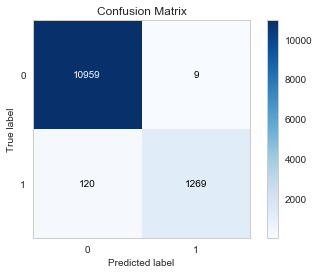

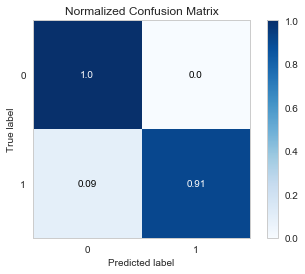

In [39]:
#Printing the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,predictions)

print(confusion_matrix)  


import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, predictions)
plt.show()

skplt.metrics.plot_confusion_matrix(y_test, predictions,normalize=True)
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     10968
          1       0.99      0.91      0.95      1389

avg / total       0.99      0.99      0.99     12357



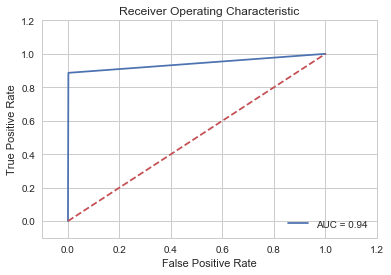

In [42]:
from sklearn.metrics import roc_curve, auc
actual = y_test
predictions = predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[0.99797685522375978, 0.99571093307437075, 0.99643926519381731, 0.99425426883547785, 0.99482074937282516, 0.99279760459658495, 0.9929594561786842, 0.99166464352189043, 0.99134094035769205, 0.98956057295460065, 0.98980335032774946, 0.98947964716355097, 0.98996520190984871, 0.98891316662620377, 0.98947964716355097, 0.98802298292465807, 0.98745650238731086, 0.98632354131261635, 0.98680909605891398, 0.98583798656631871, 0.9864853928947156, 0.9861616897305171, 0.98672817026786441, 0.9855952091931699, 0.98575706077526903]


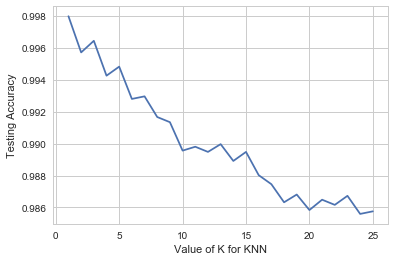

In [41]:
#Testing accuracy on normal KNN
#from sklearn.metrics import mean_squared_error
from sklearn import metrics

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)


scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, predictions))

print(scores)

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()